In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

In [2]:
sns.set(style = 'whitegrid')

In [3]:
def random_walk_on_sphere(n_steps):
  points = []
  current_point = np.array([0.0, 0.0, 1.0])

  for _ in range(n_steps):
    local_step = np.random.randn(3)


    epsilon = 0.1
    next_point = current_point + epsilon * local_step
    next_point /= np.linalg.norm(next_point)

    points.append(next_point)
    current_point = next_point

  return np.array(points)





In [4]:
n_steps = 10000
points = random_walk_on_sphere(n_steps)

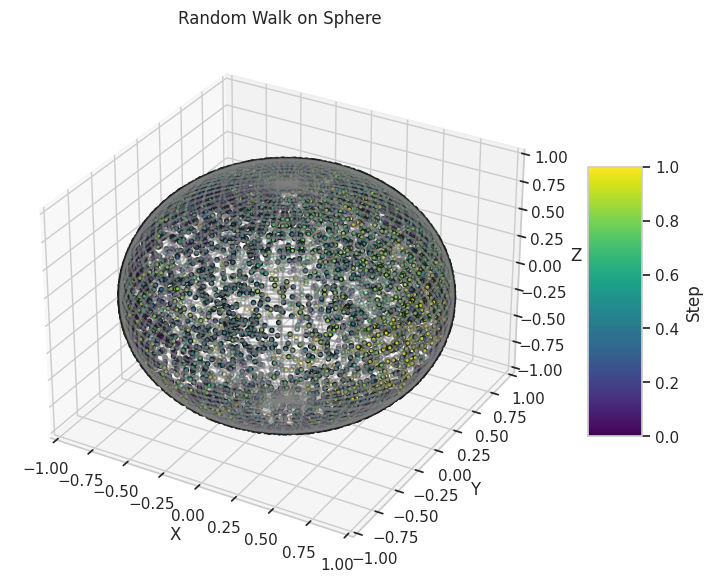

In [7]:
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(x, y, z, color='gray', alpha=0.5)


ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

scatter = ax.scatter([], [], [], c=[], cmap='viridis', s=10, edgecolor='k')

ax.set_title('Random Walk on Sphere')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Step')


def update(num):
  step = num * 10
  scatter._offsets3d = (points[:step, 0], points[:step, 1], points[:step, 2])
  scatter.set_array(np.linspace(0, 1, step))
  return scatter,


anim = FuncAnimation(fig, update, frames=n_steps // 10, interval=30, blit=False)

anim.save('random_walk_on_sphere.gif', writer='pillow', fps=30)


plt.show()


## Mauruuru koe mo to aro !